In [1]:
from acip.acip import ACIP
from utils.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
w = ACIP(X, config=dataset, verbose=False, col_ids=gene_ids)
w.flow()


*************** Filtering genes ******************
Keeping 1861 genes.

*********** Reducing dimensionality **************
Used 20 components.

****************** Clustering ********************
Trying n_clusters=4: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

Clustering complete.
Highest score is achieved for n_clusters = 4

*************** Finding Markers ******************
Completed clusters:: 100%|██████████| 4/4 [00:15<00:00,  3.90s/it]


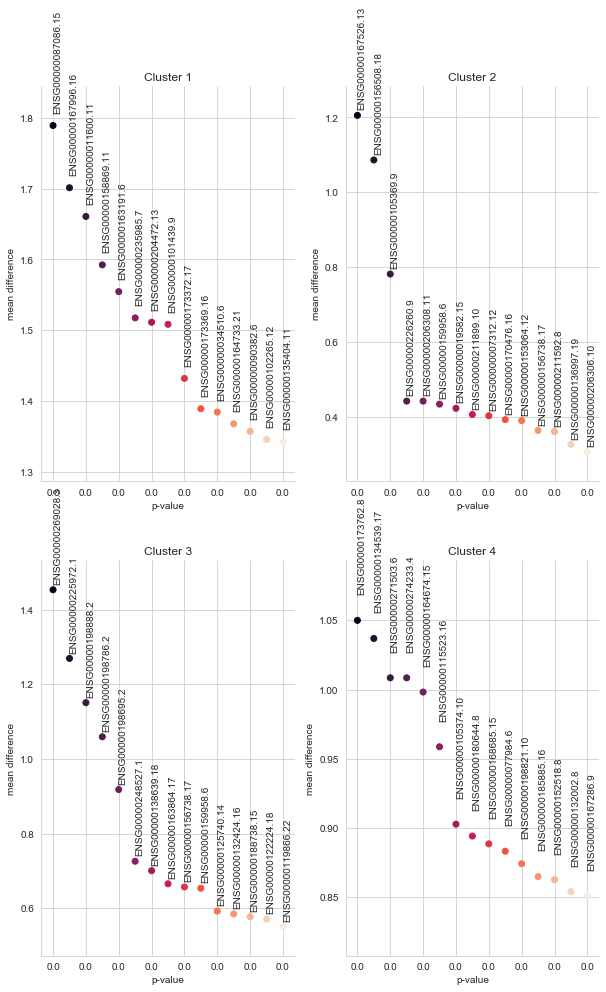

In [3]:
w.plot("top_markers")